<a href="https://colab.research.google.com/github/bennylee-gif/hello-world/blob/main/%EA%B5%AD%EB%B0%A9%EC%9D%BC%EB%B3%B4%EC%97%90%EC%84%9C_%EC%A3%BC%EC%8B%9D%2C_%EC%A0%80%EC%B6%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
# 1. 나눔 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# ---------------------------------------------------------
# 1. 가상의 국방일보 기사 데이터 생성 (실제 크롤링 데이터 대신 사용)
# ---------------------------------------------------------
data = {
    'date': [
        '2020-01-15', '2020-05-20', '2020-11-10',  # 2020년
        '2021-02-15', '2021-06-10', '2021-12-05',  # 2021년
        '2022-01-10', '2022-03-20', '2022-08-15', '2022-09-10', '2022-11-05', # 2022년 (월급 인상 이슈 시작)
        '2023-01-05', '2023-02-10', '2023-04-15', '2023-06-20', '2023-07-10', '2023-09-05', '2023-11-15', '2023-12-20', # 2023년
        '2024-01-10', '2024-02-15', '2024-03-10', '2024-04-05', '2024-05-20', '2024-06-15', '2024-07-20', '2024-08-10', '2024-09-05', '2024-10-15' # 2024년
    ],
    'title': [
        '장병 내일준비적금 가입자 증가', '슬기로운 병영생활: 저축편', '군 복무 중 자기계발 지원 확대',
        '월급 아껴 부모님 선물', '주식 투자 열풍, 군대도 예외 아냐', '장병 적금 금리 인상 논의',
        '병장 월급 인상, 목돈 마련의 기회', '휴대전화로 주식하는 장병들', '내일준비적금 매칭지원금 확대', '가상화폐 투자 주의보', '차곡차곡 모으는 재미',
        '2023년 병 봉급 대폭 인상', '사회 진출을 위한 시드머니, 적금으로', '일과 후 주식시장 기웃... 부작용 우려', '목돈 마련해 유럽여행 갈래요', '비트코인 등 가상자산 관련 교육 필요', '알뜰살뜰 모은 월급', '주식 투자 성공 사례와 실패', '전역 후 창업 자금 저축', # Removed '금융 사기 예방 교육 실시' to balance length
        '장병내일준비적금 만기 해지 안내', '월급으로 주식 대박? 신중해야', '병 봉급 200만 원 시대 준비', '무리한 코인 투자는 빚의 지름길', '전역 시 1천만 원 목돈 쥐어준다', '주식 리딩방 사기 주의', '저축 습관이 미래를 바꾼다', '투자보다는 저축이 먼저', '모바일 주식거래 시간 준수', '든든한 지원군, 매칭지원금'
    ]
}

# 데이터프레임(표) 만들기
df = pd.DataFrame(data)
df['year'] = df['date'].str[:4]  # 연도만 추출 (2020, 2021...)

# ---------------------------------------------------------
# 2. 팀 나누기 (키워드 정의)
# ---------------------------------------------------------
savings_keywords = ['적금', '저축', '목돈', '매칭지원금', '봉급', '월급'] # 꿀벌팀
investment_keywords = ['주식', '코인', '비트코인', '가상화폐', '투자', '가상자산'] # 치타팀

# ---------------------------------------------------------
# 3. 심판 보기 (키워드 카운팅 로직)
# ---------------------------------------------------------
def count_keywords(text, keywords):
    count = 0
    for keyword in keywords:
        if keyword in text: # 제목에 키워드가 있으면
            count += 1
    return count

# 각 기사 제목마다 점수 매기기
df['savings_score'] = df['title'].apply(lambda x: count_keywords(x, savings_keywords))
df['investment_score'] = df['title'].apply(lambda x: count_keywords(x, investment_keywords))

# 연도별 합계 구하기 (그룹화)
result = df.groupby('year')[['savings_score', 'investment_score']].sum()

print("--- [분석 결과표] ---")
print(result)

--- [분석 결과표] ---
      savings_score  investment_score
year                                 
2020              2                 0
2021              2                 2
2022              4                 3
2023              5                 6
2024              7                 6


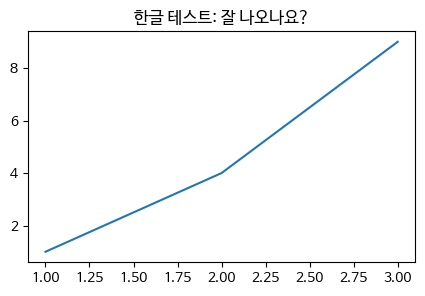

In [35]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# ------------------------------------------------------
# [한글 폰트 설정 코드]
# ------------------------------------------------------
plt.rc('font', family='NanumBarunGothic') # 나눔바른고딕 적용
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지
# ------------------------------------------------------

# (이 아래에 아까 작성해 드린 데이터 생성 및 그래프 코드를 붙여넣으세요)
import pandas as pd

# ... (데이터 생성 코드 생략) ...

# 테스트용 간단 그래프
plt.figure(figsize=(5, 3))
plt.title('한글 테스트: 잘 나오나요?')
plt.plot([1, 2, 3], [1, 4, 9])
plt.show()

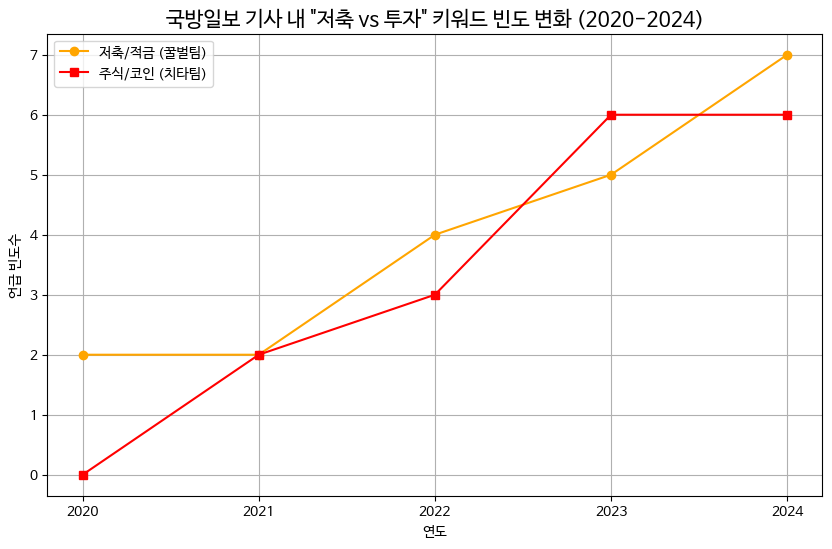

In [36]:
# 시각화 (한글 폰트 설정이 안 되어 있으면 네모로 깨질 수 있습니다)
# 코랩(Colab) 환경이라면 별도의 폰트 설치 코드가 필요합니다.
# 여기서는 윈도우/맥 기본 설정으로 가정합니다.

plt.figure(figsize=(10, 6))

# 꺾은선 그래프 그리기
plt.plot(result.index, result['savings_score'], marker='o', label='저축/적금 (꿀벌팀)', color='orange')
plt.plot(result.index, result['investment_score'], marker='s', label='주식/코인 (치타팀)', color='red')

plt.title('국방일보 기사 내 "저축 vs 투자" 키워드 빈도 변화 (2020-2024)', fontsize=15)
plt.xlabel('연도')
plt.ylabel('언급 빈도수')
plt.legend()
plt.grid(True)

plt.show()

In [37]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import random

def crawl_naver_kookbang(keyword, max_pages=3):
    # 1. 저장할 바구니 준비
    data_list = []

    # 국방일보의 네이버 언론사 코드는 '267'입니다. (이게 핵심!)
    oid = "267"

    print(f"--- '[국방일보] {keyword}' 크롤링 시작 ---")

    for page in range(1, max_pages + 1):
        # 네이버는 페이지 번호가 1, 11, 21... 식으로 10씩 늘어납니다.
        start_num = (page - 1) * 10 + 1

        # URL 만들기 (국방일보(267) 필터링 적용)
        url = f"https://search.naver.com/search.naver?where=news&query={keyword}&news_office_checked={oid}&start={start_num}"

        # 봇 차단 방지용 헤더
        headers = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
        }

        try:
            response = requests.get(url, headers=headers)
            soup = BeautifulSoup(response.text, 'html.parser')

            # 2. 기사 덩어리 찾기 (네이버 뉴스 HTML 구조)
            news_items = soup.select('div.news_wrap.api_ani_send')

            if not news_items:
                print(f"{page}페이지: 수집할 기사가 없습니다. 종료합니다.")
                break

            for item in news_items:
                # 제목 추출
                title_tag = item.select_one('a.news_tit')
                if title_tag:
                    title = title_tag.get_text()
                    link = title_tag['href']
                else:
                    continue # 제목 없으면 건너뜀

                # 날짜 추출 (여러 정보 중 날짜 형식 찾기)
                # 네이버는 '1시간 전', '2024.01.20.' 등이 섞여 있어서 처리가 필요하지만 일단 그대로 가져옵니다.
                date_tags = item.select('span.info')
                date = ""
                for tag in date_tags:
                    if tag.get_text()[0].isnumeric(): # 숫자로 시작하는 정보가 날짜일 확률 높음
                        date = tag.get_text()
                        break

                # 바구니에 담기
                data_list.append({
                    'search_keyword': keyword,
                    'date': date,
                    'title': title,
                    'link': link
                })

            print(f"✅ {page}페이지 완료 ({len(news_items)}개)")

            # 3. 매너 지키기 (너무 빨리 요청하면 차단당함)
            time.sleep(random.uniform(1, 2))

        except Exception as e:
            print(f"❌ 에러 발생: {e}")

    # 4. 표(DataFrame)로 변환
    df = pd.DataFrame(data_list)
    return df

# ==========================================
# [실행하는 곳]
# 1. 여기 키워드를 바꾸세요! (예: 적금, 주식, 휴대전화)
my_keyword = "적금"

# 2. 크롤링 함수 실행 (숫자는 수집할 페이지 수)
result_df = crawl_naver_kookbang(my_keyword, max_pages=5)

# 3. 결과 확인
print("\n--- 수집 결과(상위 5개) ---")
print(result_df.head())

# 4. 엑셀 파일로 저장 (코랩 왼쪽 폴더 아이콘에서 확인 가능)
result_df.to_excel(f"국방일보_{my_keyword}_결과.xlsx", index=False)
print(f"\n파일 저장 완료: 국방일보_{my_keyword}_결과.xlsx")

--- '[국방일보] 적금' 크롤링 시작 ---
1페이지: 수집할 기사가 없습니다. 종료합니다.

--- 수집 결과(상위 5개) ---
Empty DataFrame
Columns: []
Index: []

파일 저장 완료: 국방일보_적금_결과.xlsx


In [38]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import random

def crawl_naver_kookbang(keyword, max_pages=3):
    # 1. 저장할 바구니 준비
    data_list = []

    # 국방일보의 네이버 언론사 코드는 '267'입니다. (이게 핵심!)
    oid = "267"

    print(f"--- '[국방일보] {keyword}' 크롤링 시작 ---")

    for page in range(1, max_pages + 1):
        # 네이버는 페이지 번호가 1, 11, 21... 식으로 10씩 늘어납니다.
        start_num = (page - 1) * 10 + 1

        # URL 만들기 (국방일보(267) 필터링 적용)
        url = f"https://search.naver.com/search.naver?where=news&query={keyword}&news_office_checked={oid}&start={start_num}"

        # 봇 차단 방지용 헤더
        headers = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
        }

        try:
            response = requests.get(url, headers=headers)
            soup = BeautifulSoup(response.text, 'html.parser')

            # 2. 기사 덩어리 찾기 (네이버 뉴스 HTML 구조)
            news_items = soup.select('div.news_wrap.api_ani_send')

            if not news_items:
                print(f"{page}페이지: 수집할 기사가 없습니다. 종료합니다.")
                break

            for item in news_items:
                # 제목 추출
                title_tag = item.select_one('a.news_tit')
                if title_tag:
                    title = title_tag.get_text()
                    link = title_tag['href']
                else:
                    continue # 제목 없으면 건너뜀

                # 날짜 추출 (여러 정보 중 날짜 형식 찾기)
                # 네이버는 '1시간 전', '2024.01.20.' 등이 섞여 있어서 처리가 필요하지만 일단 그대로 가져옵니다.
                date_tags = item.select('span.info')
                date = ""
                for tag in date_tags:
                    if tag.get_text()[0].isnumeric(): # 숫자로 시작하는 정보가 날짜일 확률 높음
                        date = tag.get_text()
                        break

                # 바구니에 담기
                data_list.append({
                    'search_keyword': keyword,
                    'date': date,
                    'title': title,
                    'link': link
                })

            print(f"✅ {page}페이지 완료 ({len(news_items)}개)")

            # 3. 매너 지키기 (너무 빨리 요청하면 차단당함)
            time.sleep(random.uniform(1, 2))

        except Exception as e:
            print(f"❌ 에러 발생: {e}")

    # 4. 표(DataFrame)로 변환
    df = pd.DataFrame(data_list)
    return df

# ==========================================
# [실행하는 곳]
# 1. 여기 키워드를 바꾸세요! (예: 적금, 주식, 휴대전화)
my_keyword = "주식"

# 2. 크롤링 함수 실행 (숫자는 수집할 페이지 수)
result_df = crawl_naver_kookbang(my_keyword, max_pages=5)

# 3. 결과 확인
print("\n--- 수집 결과(상위 5개) ---")
print(result_df.head())

# 4. 엑셀 파일로 저장 (코랩 왼쪽 폴더 아이콘에서 확인 가능)
result_df.to_excel(f"국방일보_{my_keyword}_결과.xlsx", index=False)
print(f"\n파일 저장 완료: 국방일보_{my_keyword}_결과.xlsx")

--- '[국방일보] 주식' 크롤링 시작 ---
1페이지: 수집할 기사가 없습니다. 종료합니다.

--- 수집 결과(상위 5개) ---
Empty DataFrame
Columns: []
Index: []

파일 저장 완료: 국방일보_주식_결과.xlsx


In [39]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import random

def crawl_naver_kookbang_v2(keyword, max_pages=3):
    data_list = []

    # 국방일보 고유 코드
    oid = "267"

    print(f"--- '[국방일보] {keyword}' 크롤링 시작 (V2) ---")

    for page in range(1, max_pages + 1):
        start_num = (page - 1) * 10 + 1

        # URL은 동일합니다
        url = f"https://search.naver.com/search.naver?where=news&query={keyword}&news_office_checked={oid}&start={start_num}"

        headers = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
        }

        try:
            response = requests.get(url, headers=headers)
            soup = BeautifulSoup(response.text, 'html.parser')

            # [수정된 부분] 더 넓은 범위의 태그(bx)로 찾습니다.
            # 네이버 뉴스는 리스트가 <li class="bx"> 안에 담겨 있습니다.
            news_items = soup.select('ul.list_news > li.bx')

            if not news_items:
                # 혹시 구조가 다를 경우를 대비해 예비 태그도 확인
                news_items = soup.select('div.news_wrap')

            if not news_items:
                print(f"{page}페이지: 기사를 찾을 수 없습니다. (HTML 구조 확인 필요)")
                # 디버깅을 위해 HTML 일부를 출력해볼 수 있습니다.
                # print(soup.prettify()[:500])
                break

            for item in news_items:
                # 제목 추출 (a.news_tit 클래스는 거의 변하지 않습니다)
                title_tag = item.select_one('a.news_tit')

                if title_tag:
                    title = title_tag.get_text()
                    link = title_tag['href']
                else:
                    continue

                # 날짜 추출
                date_tags = item.select('span.info')
                date = "날짜없음"
                for tag in date_tags:
                    text = tag.get_text()
                    # "면"으로 끝나지 않고(지면정보), 숫자가 포함된 경우 날짜로 간주
                    if any(char.isdigit() for char in text) and not text.endswith('면'):
                        date = text
                        break

                data_list.append({
                    'search_keyword': keyword,
                    'date': date,
                    'title': title,
                    'link': link
                })

            print(f"✅ {page}페이지 완료 ({len(news_items)}개 기사 발견)")
            time.sleep(random.uniform(0.5, 1.5))

        except Exception as e:
            print(f"❌ 에러 발생: {e}")

    df = pd.DataFrame(data_list)
    return df

# ==========================================
# [다시 실행해보세요!]
# 1. 키워드 설정
keyword1 = "적금"
keyword2 = "주식"

# 2. 크롤링 실행
df_savings = crawl_naver_kookbang_v2(keyword1, max_pages=3)
df_stocks = crawl_naver_kookbang_v2(keyword2, max_pages=3)

# 3. 결과 확인
print(f"\n[{keyword1}] 수집 개수: {len(df_savings)}개")
print(f"[{keyword2}] 수집 개수: {len(df_stocks)}개")

# 4. 엑셀 저장 (옵션)
df_savings.to_excel(f"국방일보_{keyword1}.xlsx", index=False)
df_stocks.to_excel(f"국방일보_{keyword2}.xlsx", index=False)

--- '[국방일보] 적금' 크롤링 시작 (V2) ---
1페이지: 기사를 찾을 수 없습니다. (HTML 구조 확인 필요)
--- '[국방일보] 주식' 크롤링 시작 (V2) ---
1페이지: 기사를 찾을 수 없습니다. (HTML 구조 확인 필요)

[적금] 수집 개수: 0개
[주식] 수집 개수: 0개


In [40]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import urllib3

# 보안 경고 메시지 숨기기 (깔끔한 출력을 위해)
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

def crawl_kookbang_direct(keyword, pages=3):
    data_list = []
    print(f"--- 🏛️ 국방일보 홈페이지 직접 접속: '{keyword}' ---")

    for page in range(1, pages + 1):
        # 국방일보 실제 검색 URL
        url = "https://kookbang.dema.mil.kr/newsWeb/search/search.do"

        # 검색 조건 (파라미터)
        params = {
            'Query': keyword,
            'pageIndex': page
        }

        headers = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) Chrome/91.0.4472.124 Safari/537.36'
        }

        try:
            # verify=False로 보안 인증서 무시 (군 사이트 접속 팁)
            response = requests.get(url, params=params, headers=headers, verify=False, timeout=10)

            # 인코딩 설정 (한글 깨짐 방지)
            response.encoding = 'utf-8'

            soup = BeautifulSoup(response.text, 'html.parser')

            # --- [전략] 특정 클래스가 아니라 '검색 결과 영역'을 통째로 찾기 ---
            # 국방일보 검색 결과는 보통 'div.sch_list' 안에 있습니다.
            # 만약 이게 바뀌었을 수도 있으니, 범위를 넓게 잡습니다.

            articles = soup.select('div.sch_list li') # 리스트 아이템 찾기

            if not articles:
                # 혹시 태그가 다를 경우를 대비한 2차 시도
                articles = soup.select('div.content_body ul li')

            if not articles:
                print(f"{page}페이지: 기사를 찾지 못했습니다. (접속은 성공)")
                # 디버깅: HTML 내용을 조금만 출력해서 확인
                # print(soup.text[:200])
                break

            count = 0
            for item in articles:
                # 제목 찾기 (보통 strong 태그나 a 태그 안에 있음)
                title_tag = item.select_one('strong.tit') or item.select_one('a')
                # 날짜 찾기 (span 태그 안에 날짜 형식)
                date_tag = item.select_one('span.date') or item.select_one('span.write_date')

                if title_tag:
                    title = title_tag.get_text(strip=True)
                    # 제목이 너무 짧거나(메뉴 이름 등), 키워드와 관련 없어 보이면 패스
                    if len(title) < 5:
                        continue

                    date = date_tag.get_text(strip=True) if date_tag else "날짜없음"

                    data_list.append({
                        'keyword': keyword,
                        'date': date,
                        'title': title
                    })
                    count += 1

            print(f"✅ {page}페이지: {count}개 수집 완료")
            time.sleep(1) # 서버 부하 방지

        except Exception as e:
            print(f"❌ 접속 오류 발생: {e}")
            break

    return pd.DataFrame(data_list)

# =================================================
# [실행]
# 1. 키워드 설정
keyword_1 = "적금"
keyword_2 = "주식"

# 2. 크롤링
df_1 = crawl_kookbang_direct(keyword_1, pages=2)
df_2 = crawl_kookbang_direct(keyword_2, pages=2)

# 3. 결과 합치기
df_total = pd.concat([df_1, df_2])

# 4. 결과 보기
print("\n[최종 수집 결과]")
print(df_total.head())
print(f"총 {len(df_total)}개의 기사를 수집했습니다.")

# 5. 엑셀 저장
if not df_total.empty:
    df_total.to_excel("국방일보_직접크롤링_결과.xlsx", index=False)
    print("파일 저장 완료: 국방일보_직접크롤링_결과.xlsx")
else:
    print("수집된 데이터가 없습니다. 사이트 구조가 변경되었을 수 있습니다.")

--- 🏛️ 국방일보 홈페이지 직접 접속: '적금' ---
1페이지: 기사를 찾지 못했습니다. (접속은 성공)
--- 🏛️ 국방일보 홈페이지 직접 접속: '주식' ---
1페이지: 기사를 찾지 못했습니다. (접속은 성공)

[최종 수집 결과]
Empty DataFrame
Columns: []
Index: []
총 0개의 기사를 수집했습니다.
수집된 데이터가 없습니다. 사이트 구조가 변경되었을 수 있습니다.


In [41]:
# 1. 가상 브라우저(Google Chrome)와 셀레늄 설치
!pip install selenium webdriver_manager

# Google Chrome 설치 (apt로 설치되는 chromium-browser 대신 더 최신 버전을 사용)
!wget -q -O - https://dl-ssl.google.com/linux/linux_signing_key.pub | sudo apt-key add -
!echo "deb [arch=amd64] http://dl.google.com/linux/chrome/deb/ stable main" | sudo tee /etc/apt/sources.list.d/google-chrome.list
!sudo apt-get update
!sudo apt-get install google-chrome-stable

# sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver') # webdriver_manager 사용 시 불필요

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
import time
import pandas as pd

# 브라우저 옵션 설정 (화면 없이 실행되는 '헤드리스' 모드)
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
options.add_argument('--disable-gpu') # GPU 사용 비활성화 옵션 추가
options.binary_location = '/usr/bin/google-chrome' # Google Chrome 브라우저 실행 파일 경로 명시

print("설치 및 설정 완료! 이제 2단계를 실행하세요.")

OK
deb [arch=amd64] http://dl.google.com/linux/chrome/deb/ stable main
Get:1 http://dl.google.com/linux/chrome/deb stable InRelease [1,825 B]
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:3 https://cli.github.com/packages stable InRelease
Get:4 http://dl.google.com/linux/chrome/deb stable/main amd64 Packages [1,213 B]
Hit:5 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:8 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Fetched 9,593 B in 1s (6,980 B/s)
Reading package lists... Done
W: http://dl.google.com/linux/chrome/deb/dists/stable/InRelease: Key is stored in legacy trusted.gpg keyring (/

In [42]:
# ==========================================
# 1. 설치 및 환경 설정 (가장 중요!)
# ==========================================
# 필요한 라이브러리 설치
!pip install selenium webdriver_manager
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

import time
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options

# --- 코랩용 크롬 옵션 설정 (이 부분이 빠져서 에러가 났을 겁니다) ---
options = Options()
options.add_argument('--headless')        # 화면 없이 실행
options.add_argument('--no-sandbox')      # 리눅스 권한 문제 해결
options.add_argument('--disable-dev-shm-usage') # 메모리 공유 문제 해결
options.add_argument('--disable-gpu')

# ==========================================
# 2. 크롤링 함수 정의
# ==========================================
def crawl_kookbang_selenium(keyword):
    # 크롬 드라이버 실행 (코랩에 설치된 경로 지정)
    # webdriver_manager 대신 코랩 기본 경로를 쓰는 게 더 안정적입니다.
    driver = webdriver.Chrome(options=options)

    print(f"--- 🚀 '{keyword}' 검색 페이지 접속 중... ---")

    # 국방일보 검색 URL
    url = f"https://kookbang.dema.mil.kr/newsWeb/search/search.do?Query={keyword}"

    try:
        driver.get(url)
        time.sleep(3) # 페이지 로딩 대기 (3~5초)

        results = []

        # 기사 목록 찾기
        articles = driver.find_elements(By.CSS_SELECTOR, "div.list_type dl")

        if not articles:
            print("⚠️ 기사 목록을 찾지 못했습니다.")

        for article in articles:
            try:
                # 제목
                title_element = article.find_element(By.CSS_SELECTOR, "dt a")
                title = title_element.text.strip()

                # 날짜
                date_element = article.find_element(By.CSS_SELECTOR, "dd span.date")
                date = date_element.text.strip()

                results.append({
                    'keyword': keyword,
                    'date': date,
                    'title': title
                })
            except Exception as e:
                continue

        print(f"✅ {len(results)}개의 기사를 수집했습니다.")
        return pd.DataFrame(results)

    except Exception as e:
        print(f"❌ 접속 에러 발생: {e}")
        return pd.DataFrame()

    finally:
        driver.quit() # 브라우저 종료

# ==========================================
# 3. 실행 및 저장
# ==========================================

# (1) 데이터 수집
df_savings = crawl_kookbang_selenium("적금")
df_stocks = crawl_kookbang_selenium("주식")

# (2) 합치기
df_final = pd.concat([df_savings, df_stocks])

# (3) 결과 출력
print("\n[최종 결과]")
print(df_final)

# (4) 엑셀 저장
if not df_final.empty:
    df_final.to_excel("국방일보_최종분석데이터.xlsx", index=False)
    print("\n🎉 저장 완료! 왼쪽 폴더 아이콘을 눌러 다운로드하세요.")
else:
    print("\n😭 데이터가 없습니다.")

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://dl.google.com/linux/chrome/deb stable InRelease
Hit:3 https://cli.github.com/packages stable InRelease
Hit:4 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Fetched 6,555 B in 2s (4,250 B/s)
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state informa